**Visual story telling part 1: Green buildings**
------------------------------------------------

### **Problem**

An Austin real-estate developer is interested in the possible economic
impact of “going green” in her latest project: a new 15-story mixed-use
building on East Cesar Chavez, just across I-35 from downtown. Will
investing in a green building be worth it, from an economic perspective?
The baseline construction costs are $100 million, with a 5% expected
premium for green certification.


> Goal: The developer listened to this recommendation, understood the
> analysis, and still felt unconvinced. She has therefore asked you to
> revisit the report, so that she can get a second opinion.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = 'greenbuildings.csv'
df = pd.read_csv(file_path)

# Print the first 5 rows to check the data
print(df.head())

   CS_PropertyID  cluster    size  empl_gr   Rent  leasing_rate  stories  age  \
0         379105        1  260300     2.22  38.56         91.39       14   16   
1         122151        1   67861     2.22  28.57         87.14        5   27   
2         379839        1  164848     2.22  33.31         88.94       13   36   
3          94614        1   93372     2.22  35.00         97.04       13   46   
4         379285        1  174307     2.22  40.69         96.58       16    5   

   renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0          0        1  ...             1    0          1         4988   
1          0        0  ...             0    0          1         4988   
2          1        0  ...             0    0          1         4988   
3          1        0  ...             0    0          0         4988   
4          0        1  ...             0    0          1         4988   

   hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \

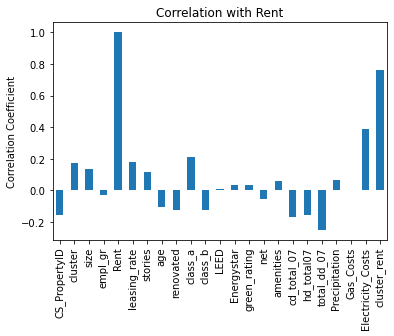

In [7]:
correlations = df.corrwith(df['Rent'])

# Plot the correlations
correlations.plot(kind='bar')
plt.title('Correlation with Rent')
plt.ylabel('Correlation Coefficient')
plt.show()

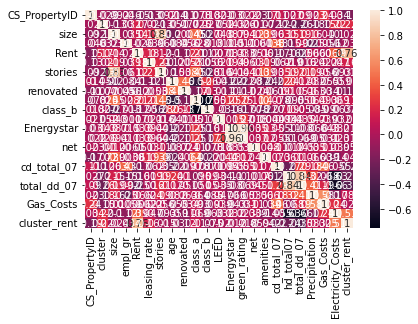

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### **observations**
-   Rent is correlated with the cluster and cluster rent
-   Rent is correlated with the size and electricity cost 
-   Rent is also correlated with class_a
-   Age is negatively correlated with rent 
-   Class a buildings get higher rent as they are premium buildings

In [10]:
groupa = df.groupby(['class_a'])

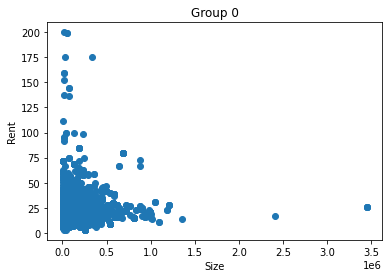

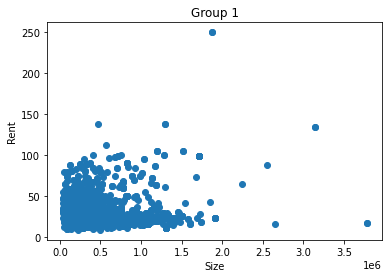

In [11]:
for name, group in groupa:
    plt.scatter(group['size'], group['Rent'])
    plt.title(f'Group {name}')
    plt.xlabel('Size')
    plt.ylabel('Rent')
    plt.show()

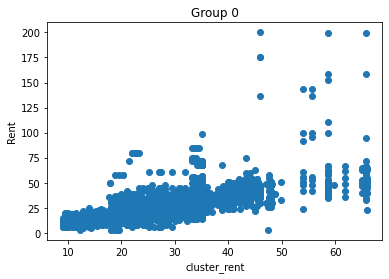

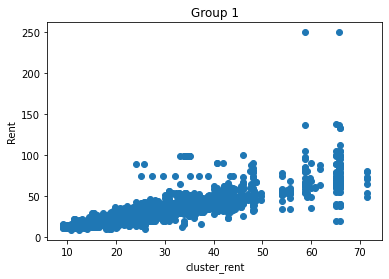

In [12]:
for name, group in groupa:
    plt.scatter(group['cluster_rent'], group['Rent'])
    plt.title(f'Group {name}')
    plt.xlabel('cluster_rent')
    plt.ylabel('Rent')
    plt.show()

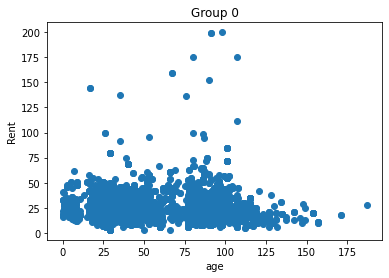

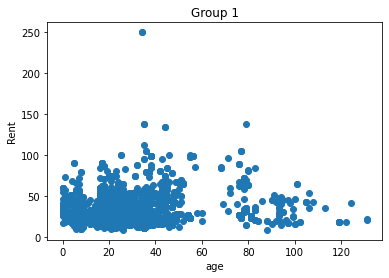

In [13]:
for name, group in groupa:
    plt.scatter(group['age'], group['Rent'])
    plt.title(f'Group {name}')
    plt.xlabel('age')
    plt.ylabel('Rent')
    plt.show()

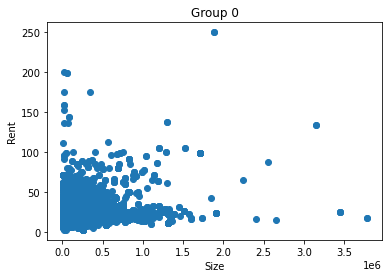

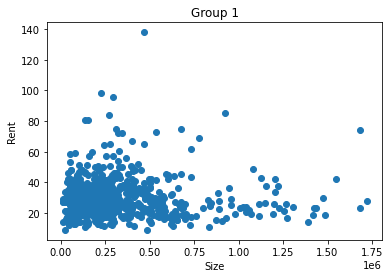

In [14]:
groupgreen = df.groupby(['green_rating'])
for name, group in groupgreen:
    plt.scatter(group['size'], group['Rent'])
    plt.title(f'Group {name}')
    plt.xlabel('Size')
    plt.ylabel('Rent')
    plt.show()

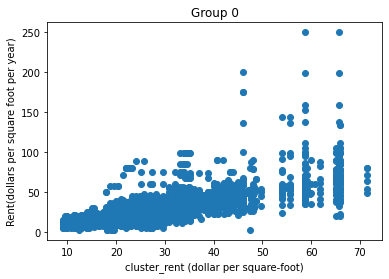

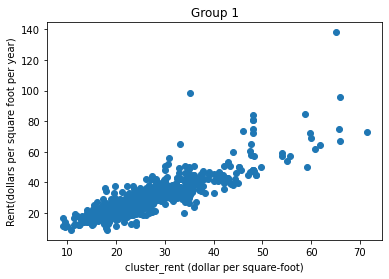

In [15]:
for name, group in groupgreen:
    plt.scatter(group['cluster_rent'], group['Rent'])
    plt.title(f'Group {name}')
    plt.xlabel('cluster_rent (dollar per square-foot)')
    plt.ylabel('Rent(dollars per square foot per year)')
    plt.show()

In [16]:
green = df[df['green_rating'] == 1]

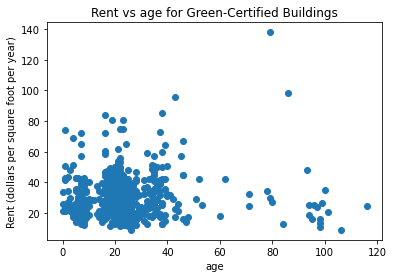

In [20]:
plt.scatter(green['age'], green['Rent'])
plt.xlabel('age')
plt.ylabel('Rent (dollars per square foot per year)')
plt.title('Rent vs age for Green-Certified Buildings')
plt.show()

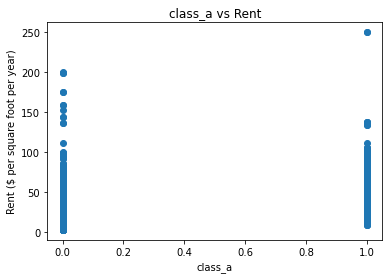

In [22]:
plt.hist( bins= (0,1,2), label=['Class A', 'Not Class A'])
plt.xlabel('Green Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Green Ratings for Class A and Not Class A Buildings')
plt.legend()
plt.show()

### **Visualizations**
-   Rent has smaller correlation with size for green buildings
-   Rather, rent is correlated more with local market price for green buildings
-   Most of the class A buildings are also younger
-   There is a small negative correlation of age and rent in green buildings
-   We conclude that there could be other reasons that affect the rent besides size
-   Class a buildings get higher rent than non Class a

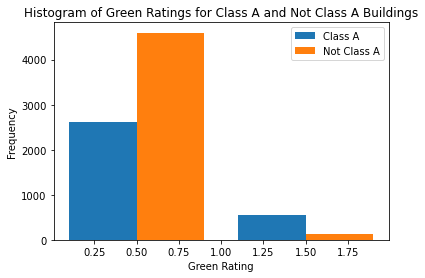

In [18]:
# Filter the data based on class_a
class_a_1 = df[df['class_a'] == 1]
class_a_0 = df[df['class_a'] == 0]

# Create the histogram
plt.hist([class_a_1['green_rating'], class_a_0['green_rating']], bins= (0,1,2), label=['Class A', 'Not Class A'])
plt.xlabel('Green Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Green Ratings for Class A and Not Class A Buildings')
plt.legend()
plt.show()

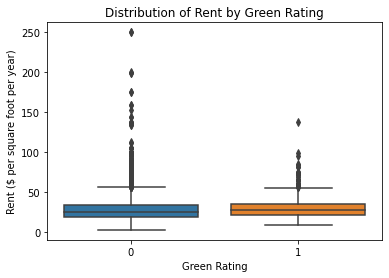

In [24]:
sns.boxplot(x='green_rating', y='Rent', data=df)
plt.xlabel('Green Rating')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Distribution of Rent by Green Rating')
plt.show()

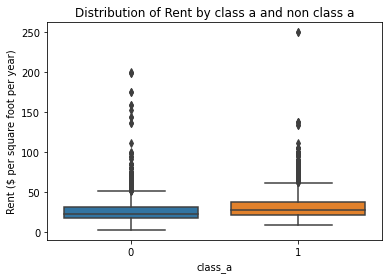

In [25]:
sns.boxplot(x='class_a', y='Rent', data=df)
plt.xlabel('class_a')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Distribution of Rent by class a and non class a')
plt.show()

**Observations**
-   Most of the green buildings are younger than non-green buildings
-   The proportion of class a buildings is higher in green buildings
-   The proportion of green and non-green building increases as the size
    of buildings increases
-   The is a significant difference in the of rent of class a and
    non-class a buildings but green rating only has a slightly higher rent
    due to less green buildings than non green
-   The rent difference is not uniform across different sizes and ages

In [69]:
class_a_1 = class_a_1.copy() # Create a copy of the DataFrame slice
class_a_1['size_bin'] = pd.cut(class_a_1['size'], bins=range(0, class_a_1['size'].max() + 10000, 10000), include_lowest=True)
avg_rent = df.groupby(['size_bin', 'green_rating'])['Rent'].mean().reset_index()


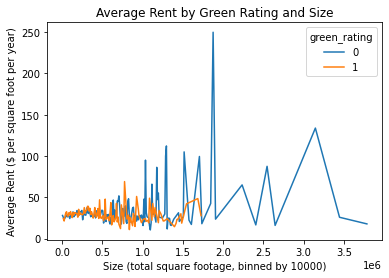

In [74]:
# Calculate the midpoint of each bin
avg_rent['size_midpoint'] = avg_rent['size_bin'].apply(lambda x: (x.left + x.right) / 2)

# Plot using the midpoint
sns.lineplot(x='size_midpoint', y='Rent', hue='green_rating', data=avg_rent)
plt.xlabel('Size (total square footage, binned by 10000)')
plt.ylabel('Average Rent ($ per square foot per year)')
plt.title('Average Rent by Green Rating and Size')
plt.show()

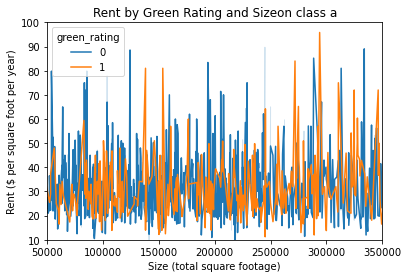

In [62]:
sns.lineplot(x='size', y='Rent', hue='green_rating', data=class_a_1)
# Set x-axis and y-axis limits 
min_size = 50000
max_size = 350000
plt.xlim(min_size, max_size)
plt.ylim(10,100)
plt.xlabel('Size (total square footage)')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent by Green Rating and Sizeon class a')
plt.show()

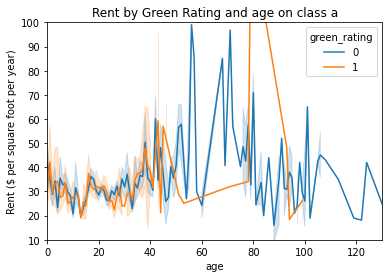

In [66]:
sns.lineplot(x='age', y='Rent', hue='green_rating', data=class_a_1)
# Set x-axis and y-axis limits 
plt.xlim(0,130)
plt.ylim(10,100)
plt.xlabel('age')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent by Green Rating and age on class a')
plt.show()

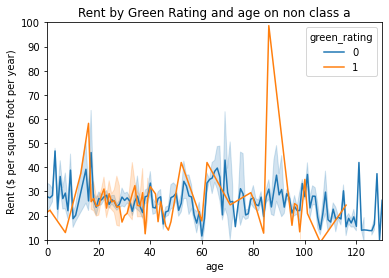

In [67]:
sns.lineplot(x='age', y='Rent', hue='green_rating', data=class_a_0)
# Set x-axis and y-axis limits 
plt.xlim(0,130)
plt.ylim(10,100)
plt.xlabel('age')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent by Green Rating and age on non class a')
plt.show()

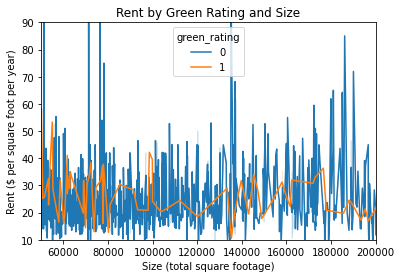

In [48]:
sns.lineplot(x='size', y='Rent', hue='green_rating', data=class_a_0)
# Set x-axis and y-axis limits 
min_size = 50000
max_size = 200000
plt.xlim(min_size, max_size)
plt.ylim(10,90)
plt.xlabel('Size (total square footage)')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent by Green Rating and Size on non class a')
plt.show()

### **Visualizations**
-  For a size of 250,000 sqft, the green buildings have a higher rent when it is a class a building
-  The rent of green buildings is lower than non-green ones when they are not class a buildings
-  The rent of green buildings peak on age 80-100 for all type of buildings and starts low when it is not class a
-  The rent difference is not uniform across different sizes, age, and cluster rent plays a role, so rate is not the only factor that determines rate and returns


### **Analysis**

**Calculations**

-   The rent difference is not uniform across different sizes and age,
    so we cannot use a fixed difference in rent to calculate the returns
-   For the same reason, we should consider only the buildings that have
    sizes between 200k and 300k sq.ft
-   We should also use the median leasing rate of such buildings instead
    of 90% rate
    
**Conclusion**

-   If the building is not a Class-A building, it is not wise to invest
    in a green building since the average returns for 5 years are
    negative. And should always invest in a Class-A green building to yield
    positive returns
-   We can expect a occupancy rate of 91.6% on such buildings
-   The average difference in rent for green and non-green buildings
    that are class a and whose sizes ranging from 200k to 300k is 3.097
-   Hence, for a 250k sq.ft building at 91.6% occupancy, we expect to
    recuperate the costs in 7.05 years
-   The analysis conducted by the statistics expert appears to be flawed, 
    as it overlooks several essential factors that influence rent. Initially, 
    the expert utilized the median rent across all buildings to compute the 
    returns, neglecting to incorporate other critical aspects like the size 
    and class of the buildings into the evaluation. For example, it has been observed 
    that Class A buildings with green certifications tend to command higher 
    rents compared to non-green buildings of the same class. This oversight in 
    the analysis fails to provide a comprehensive understanding of the factors affecting rent.